In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
from umap import UMAP

<IPython.core.display.Javascript object>

In [3]:
mnist = fetch_openml("Fashion-MNIST", version=1, cache=True)

<IPython.core.display.Javascript object>

In [4]:
np.random.seed(123)

indices = np.random.choice(70000, 10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


<IPython.core.display.Javascript object>

In [ ]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

class_dict = dict(enumerate(class_names))
# [class_dict[label] for label in y.astype(int)]

In [10]:
umap = UMAP(n_components=2, n_neighbors=40, min_dist=0.5)
umap_df = pd.DataFrame(umap.fit_transform(X), columns=["0", "1"])

<IPython.core.display.Javascript object>

In [11]:
umap_df["label"] = [class_dict[label] for label in y.astype(int)]

<IPython.core.display.Javascript object>

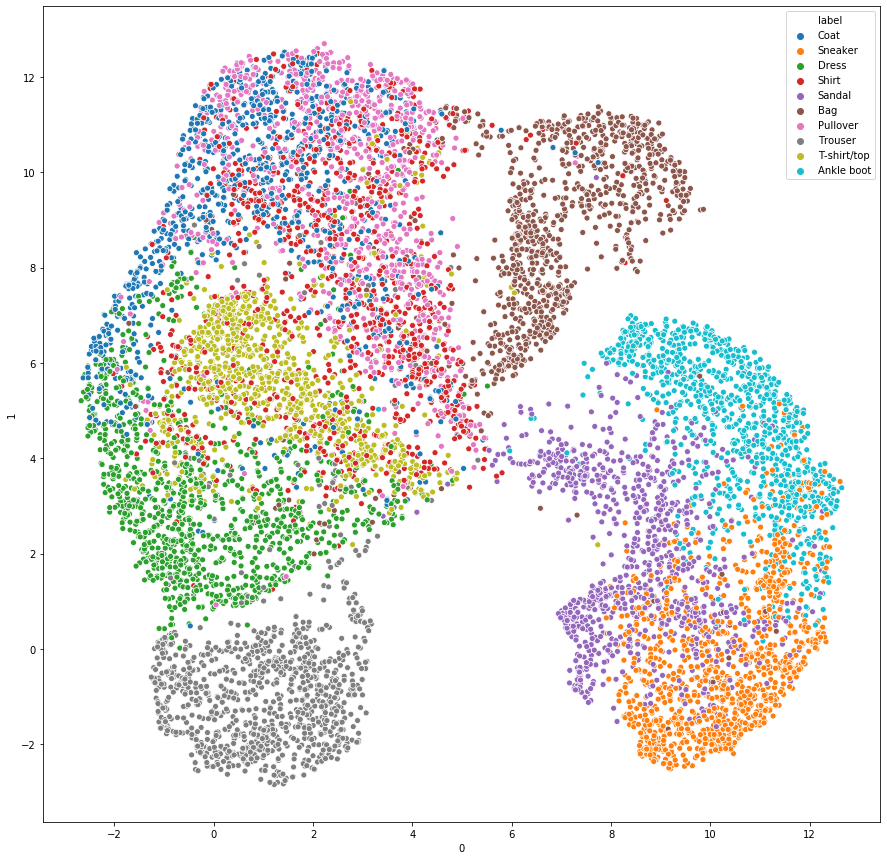

<IPython.core.display.Javascript object>

In [12]:
plt.figure(figsize=(15, 15))
sns.scatterplot("0", "1", hue="label", data=umap_df)

UMAP even with the default parameters gives a pretty great representation of the data. At first glance, I would say t-SNE is slightly better but I don't think it's really worth the extra processing time. After just a little bit of tuning, I was able to generate some values that create recognizable clusters without losing too much global information